In [173]:
import os
import math
import numpy as np
import datetime as dt
import time
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders.target_encoder import TargetEncoder

In [174]:
data = pd.read_csv('Data/TrainingData.csv', index_col=0)

C:\Users\Nithya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [175]:
data.replace('missing', np.nan, inplace=True)
data.replace('na', np.nan, inplace=True)
int_cols = list(set(data.columns) - {'mvar47'})
data[int_cols] = data[int_cols].astype(float)
data.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar48,default_ind
count,79267.000000,77114.000000,82465.000000,82465.000000,82465.000000,63299.000000,7.532600e+04,63291.000000,71318.000000,8.246500e+04,...,76671.000000,17930.000000,25736.000000,80977.000000,82111.000000,74851.000000,37080.000000,59397.000000,83000.000000,83000.000000
mean,1747.511865,1.054816,5.401784,0.461151,1.084012,1633.429280,1.750797e+04,6822.332227,34030.596329,3.022857e+04,...,0.087673,97.851158,72.016570,0.331550,6.553604,0.706595,0.070523,0.093187,556.021277,0.287410
std,94.830127,1.556682,11.091569,1.704292,5.743899,3667.183981,4.677222e+04,10060.346814,50673.150005,6.617798e+04,...,0.423403,29.530657,24.508469,0.373973,6.273107,0.245915,0.290383,0.329054,1106.953295,0.452557
min,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,2.000000,0.000000
25%,1680.000000,0.131800,0.000000,0.000000,0.000000,41.000000,1.750250e+03,496.000000,3542.250000,1.153000e+03,...,0.000000,90.149500,58.174750,0.000000,2.000000,0.515280,0.000000,0.000000,8.000000,0.000000
50%,1743.000000,0.513000,0.300000,0.000000,0.000000,297.000000,7.020500e+03,2507.000000,14389.000000,9.525000e+03,...,0.000000,100.000000,78.839500,0.200000,5.000000,0.739500,0.000000,0.000000,17.000000,0.000000
75%,1813.000000,1.386200,6.595000,0.000000,0.000000,1381.000000,1.811300e+04,9869.500000,44413.000000,3.428800e+04,...,0.000000,111.327000,91.596750,0.571430,10.000000,0.945120,0.000000,0.000000,111.000000,1.000000
max,1950.000000,31.018100,399.334000,25.754000,165.492000,94302.000000,5.637108e+06,291810.000000,840658.000000,5.647073e+06,...,21.000000,631.360000,182.111000,2.000000,91.000000,1.000000,7.000000,5.000000,3247.000000,1.000000


## Missing Values

In [189]:
nan_per

mvar1           3733
mvar2           5886
mvar3            535
mvar4            535
mvar5            535
mvar6          19701
mvar7           7674
mvar8          19709
mvar9          11682
mvar10           535
mvar11         46717
mvar12         14578
mvar13          9689
mvar14             0
mvar15         33519
mvar16         19243
mvar17         16499
mvar18         15359
mvar19             5
mvar20           535
mvar21         23462
mvar22         30668
mvar23         42311
mvar24         19530
mvar25          7862
mvar26         10929
mvar27         13650
mvar28           535
mvar29           535
mvar30         37988
mvar31         58539
mvar32          7862
mvar33          1869
mvar34           535
mvar35         34868
mvar36          3159
mvar37          7862
mvar38           535
mvar39          6329
mvar40         65070
mvar41         57264
mvar42          2023
mvar43           889
mvar44          8149
mvar45         45920
mvar46         23603
mvar47             0
mvar48       

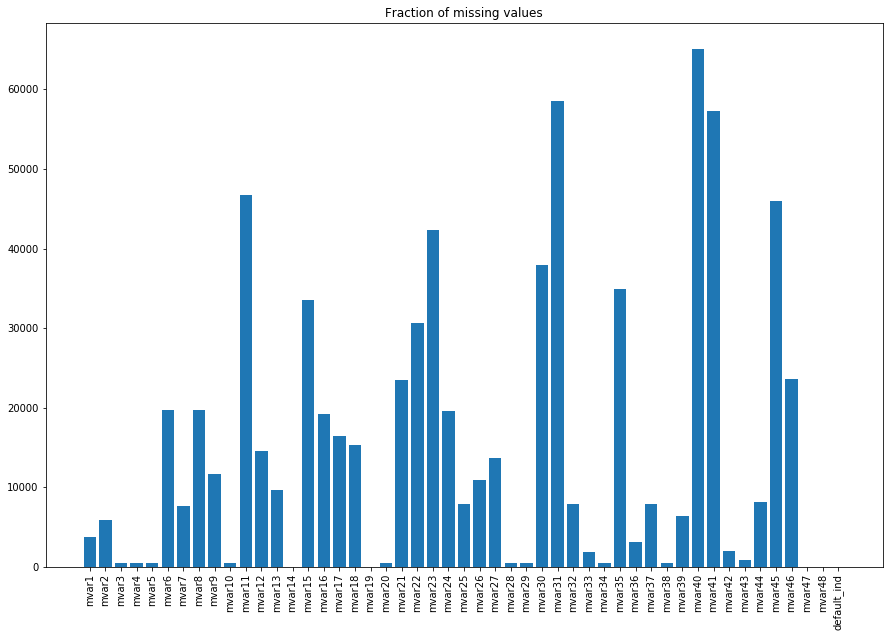

In [186]:
cols = list(data.columns)
nan_per = data.isna().sum(axis=0)
#/data.shape[0]
plt.figure(figsize=(15,10))
plt.bar(cols,nan_per)
plt.xticks(rotation='vertical')
plt.title('Fraction of missing values')
plt.show()

## Basic imputataion

In [177]:
def basic_impute(data, cols, type_='mean'):   
    
    if type_ == 'mean':
        return data.fillna(data[cols].mean()) 
    
    if type_ == 'median':
        return data.fillna(data[cols].median())
    
    if type_ =='mode':
        md = data[cols].mode()
        return data.fillna(md.iloc[0]) 
    
    if type_ == 'CF': #CF - Customer friendly
        imp_vals = data.mean()
        v = [40,31,41,45,35,46,24,16,17,18,12,9,39,2,42,43]
        for i in v:
            imp_vals['mvar'+str(i)] = 0
        med = data.median()
        imp_vals['mvar11'] = med['mvar11']
        return data.fillna(imp_vals[cols])    

## Encoding

In [178]:
def encoding(train_data,test_data=None):
    
    counts = train_data.groupby('mvar48')['default_ind'].count()
    means = train_data.groupby('mvar48')['default_ind'].mean()
    m = 0
    smooth_mean = (counts * means + m * train_data['mvar48'].mean()) / (counts + m)
    enc_48 = dict(smooth_mean)
    train_data['mvar48'] = train_data['mvar48'].map(enc_48)
    train_data = train_data.replace({'C':0,'L':1})
    if test_data==None:
        return train_data
    else:
        test_data = test_data.replace({'C':0,'L':1})
        test_data['mvar48'] = test_data['mvar48'].map(enc_48)
        return train_data, test_data     
    

## LDA 

In [179]:
data_enc = encoding(data)
data_imp = basic_impute(data_enc,data_enc.columns,'CF')

In [180]:
y = data_imp['default_ind']
X_cols = list(set(data_imp.columns) - {'default_ind'})
X = data_imp[X_cols]

In [185]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
X_t = LDA.fit_transform(X.values, y.values)
LDA.explained_variance_ratio_

array([1.])

## Gen code

In [140]:
nan_count = data.isna().sum(axis=0)
nan_count

mvar1           3733
mvar2           5886
mvar3            535
mvar4            535
mvar5            535
mvar6          19701
mvar7           7674
mvar8          19709
mvar9          11682
mvar10           535
mvar11         46717
mvar12         14578
mvar13          9689
mvar14             0
mvar15         33519
mvar16         19243
mvar17         16499
mvar18         15359
mvar19             5
mvar20           535
mvar21         23462
mvar22         30668
mvar23         42311
mvar24         19530
mvar25          7862
mvar26         10929
mvar27         13650
mvar28           535
mvar29           535
mvar30         37988
mvar31         58539
mvar32          7862
mvar33          1869
mvar34           535
mvar35         34868
mvar36          3159
mvar37          7862
mvar38           535
mvar39          6329
mvar40         65070
mvar41         57264
mvar42          2023
mvar43           889
mvar44          8149
mvar45         45920
mvar46         23603
mvar47             0
mvar48       

In [118]:
X_imp = basic_impute(X,X.columns)

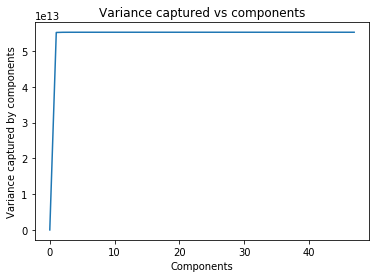

In [119]:
from sklearn.decomposition import PCA
comp = np.array(range(X_imp.shape[1]))
var_explained = []
for c in comp:
    pca = PCA(n_components=c)
    pca.fit(X_imp)  
    #print(c,len(pca.explained_variance_ratio_))
    var_explained.append(np.sum(pca.explained_variance_))
    
plt.plot(comp,var_explained)
plt.xlabel('Components')
plt.ylabel('Variance captured by components')
plt.title('Variance captured vs components')
plt.show()

In [93]:
#Location ID:
t_enc = TargetEncoder()
#t_enc.fit_transform(data['mvar48'].values.astype(str), data['default_ind'].values)


In [ ]:
data_mean  = data.fillna(data.mean())
data_median  = data.fillna(data.median())
mode = data.mode()
data_mode = data.fillna(mode.iloc[0])
imp_vals = data.mean()
v = [40,31,41,45,35,46,24,16,17,18,12,9,39,2,42,43]
for i in v:
    imp_vals['mvar'+str(i)] = 0
med = data.median()
imp_vals['mvar11'] = med['mvar11']

In [78]:
#Location ID
unique_, counts_ = np.unique(data['mvar48'], return_counts=True)
dict(zip(unique_, counts_))

data.groupby('mvar48')['default_ind'].std()
data.groupby('mvar48')['default_ind'].mean()

mvar48
0.000000    0.000000
0.100000    0.100000
0.111111    0.111111
0.125000    0.125000
0.142857    0.142857
0.166667    0.166667
0.169014    0.169014
0.181818    0.181818
0.200000    0.200000
0.203209    0.203209
0.204225    0.204225
0.205674    0.205674
0.214286    0.214286
0.215496    0.215496
0.219895    0.219895
0.225225    0.225225
0.231228    0.231228
0.236667    0.236667
0.238095    0.238095
0.245136    0.245136
0.246032    0.246032
0.246224    0.246224
0.246851    0.246851
0.247893    0.247893
0.248682    0.248682
0.250000    0.250000
0.250696    0.250696
0.253333    0.253333
0.255800    0.255800
0.256091    0.256091
0.258550    0.258550
0.260870    0.260870
0.262243    0.262243
0.265906    0.265906
0.268558    0.268558
0.270300    0.270300
0.273048    0.273048
0.274908    0.274908
0.276907    0.276907
0.280171    0.280171
0.280771    0.280771
0.282864    0.282864
0.285714    0.285714
0.287129    0.287129
0.300000    0.300000
0.310078    0.310078
0.310093    0.310093
0.3208

In [77]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(10)

a = X.loc[~X['mvar3'].isna()].drop('mvar3',axis = 1)
imputed = basic_impute(a,a.columns,'CF')
#imputed.isna()